In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df=pd.read_csv("D:/Python_nb/stk_pred.csv",encoding="ISO-8859-1")

In [3]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [4]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [5]:

data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [6]:
for i in range(data.shape[1]):
    data.iloc[:, i] = data.iloc[:, i].str.lower()

In [7]:
new_Index = data.columns # Assign column names of 'data' to new_Index
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [8]:
headlines = [' '.join(str(x) for x in data.iloc[row, :]) for row in range(len(data.index))]

In [ ]:
'''headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [ ]:
#headlines[0]

In [32]:
vectorizer = CountVectorizer(ngram_range=(1,1))
X_train = vectorizer.fit_transform(headlines)
y_train = train['Label']

In [33]:
classifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [34]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))

In [35]:
test_dataset = vectorizer.transform(test_transform)

In [36]:
predictions = classifier.predict(test_dataset)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [38]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)


[[138  48]
 [ 12 180]]
0.8412698412698413
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       186
           1       0.79      0.94      0.86       192

    accuracy                           0.84       378
   macro avg       0.85      0.84      0.84       378
weighted avg       0.85      0.84      0.84       378



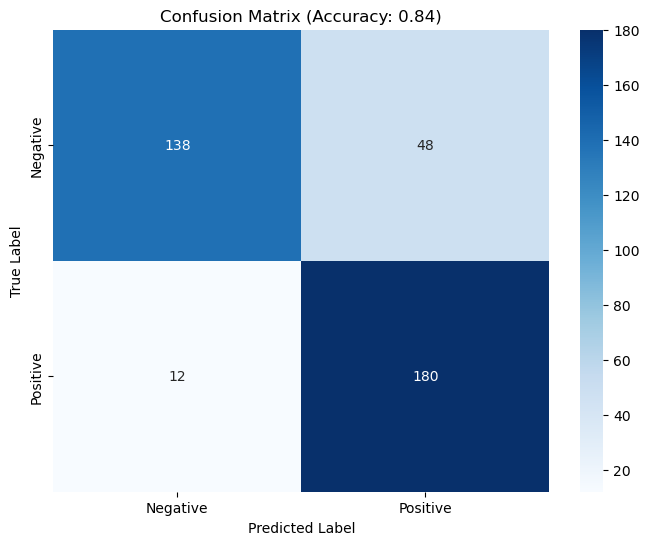

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Accuracy: {score:.2f})')
plt.show()

In [40]:
from sklearn.metrics import classification_report
y_test = test['Label']
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.92      0.74      0.82       186
           1       0.79      0.94      0.86       192

    accuracy                           0.84       378
   macro avg       0.85      0.84      0.84       378
weighted avg       0.85      0.84      0.84       378



In [41]:

user_input = input("Enter a news headline:\n")
cleaned_input = user_input.strip()
vectorized_input = vectorizer.transform([cleaned_input])

predicted_label = classifier.predict(vectorized_input)[0]

if predicted_label == 1:
    print("Predicted Stock Movement: Up")
else:
    print("Predicted Stock Movement: Down")


Enter a news headline:
 Sensex, Nifty 50 rise for 6th consecutive session— 10 key highlights of Indian stock market today


Predicted Stock Movement: Up


In [42]:
# Sample stock market-related documents (e.g., news headlines)
documents = [
    "Stock prices soar as market rebounds",
    "Market crash leads to falling stock prices",
    "Investors are optimistic about stock market recovery",
    "Stock market volatility increases amid economic uncertainty"
]
documents

['Stock prices soar as market rebounds',
 'Market crash leads to falling stock prices',
 'Investors are optimistic about stock market recovery',
 'Stock market volatility increases amid economic uncertainty']

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()
import pandas as pd
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
df_tfidf

,about,amid,are,as,crash,economic,falling,increases,investors,leads,market,optimistic,prices,rebounds,recovery,soar,stock,to,uncertainty,volatility
0,0.000000,0.000000,0.000000,0.489924,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.255662,0.000000,0.386261,0.489924,0.000000,0.489924,0.255662,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.43996,0.000000,0.43996,0.000000,0.000000,0.43996,0.229589,0.000000,0.346869,0.000000,0.000000,0.000000,0.229589,0.43996,0.000000,0.000000
2,0.424682,0.000000,0.424682,0.000000,0.00000,0.000000,0.00000,0.000000,0.424682,0.00000,0.221616,0.424682,0.000000,0.000000,0.424682,0.000000,0.221616,0.00000,0.000000,0.000000
3,0.000000,0.424682,0.000000,0.000000,0.00000,0.424682,0.00000,0.424682,0.000000,0.00000,0.221616,0.000000,0.000000,0.000000,0.000000,0.000000,0.221616,0.00000,0.424682,0.424682


In [44]:
for i, doc in enumerate(documents):
    print(f"Document {i+1}: {doc}")
    scores = df_tfidf.iloc[i]
    top_words = scores.sort_values(ascending=False).head(3)
    print("Top words:", ', '.join(top_words.index))
    print()

Document 1: Stock prices soar as market rebounds
Top words: as, soar, rebounds

Document 2: Market crash leads to falling stock prices
Top words: to, crash, falling

Document 3: Investors are optimistic about stock market recovery
Top words: about, investors, are

Document 4: Stock market volatility increases amid economic uncertainty
Top words: volatility, increases, uncertainty



In [45]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(documents)
import pandas as pd
df_bow = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
df_bow

,about,amid,are,as,crash,economic,falling,increases,investors,leads,market,optimistic,prices,rebounds,recovery,soar,stock,to,uncertainty,volatility
0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0
1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0
2,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0
3,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf

,about,amid,are,as,crash,economic,falling,increases,investors,leads,market,optimistic,prices,rebounds,recovery,soar,stock,to,uncertainty,volatility
0,0.000000,0.000000,0.000000,0.489924,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.255662,0.000000,0.386261,0.489924,0.000000,0.489924,0.255662,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.43996,0.000000,0.43996,0.000000,0.000000,0.43996,0.229589,0.000000,0.346869,0.000000,0.000000,0.000000,0.229589,0.43996,0.000000,0.000000
2,0.424682,0.000000,0.424682,0.000000,0.00000,0.000000,0.00000,0.000000,0.424682,0.00000,0.221616,0.424682,0.000000,0.000000,0.424682,0.000000,0.221616,0.00000,0.000000,0.000000
3,0.000000,0.424682,0.000000,0.000000,0.00000,0.424682,0.00000,0.424682,0.000000,0.00000,0.221616,0.000000,0.000000,0.000000,0.000000,0.000000,0.221616,0.00000,0.424682,0.424682


In [47]:
from collections import Counter
all_words = ' '.join(documents).split()
word_freq = Counter(all_words)
print("Most common words:", word_freq.most_common(5))

Most common words: [('market', 3), ('Stock', 2), ('prices', 2), ('stock', 2), ('soar', 1)]


In [48]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.3 MB/s eta 0:00:00


In [49]:
from textblob import TextBlob
for i, doc in enumerate(documents):
    blob = TextBlob(doc)
    print(f"Document {i+1} Sentiment: Polarity={blob.sentiment.polarity}, Subjectivity={blob.sentiment.subjectivity}")

Document 1 Sentiment: Polarity=0.0, Subjectivity=0.0
Document 2 Sentiment: Polarity=0.0, Subjectivity=0.0
Document 3 Sentiment: Polarity=0.0, Subjectivity=0.0
Document 4 Sentiment: Polarity=0.2, Subjectivity=0.2


In [50]:
# Sample dataset: list of (label, message) tuples
data = [
    ('ham', "Stock prices are expected to rise tomorrow."),
    ('spam', "Congratulations! You've won free stock tips. Click here!"),
    ('ham', "Market analysis shows positive trends."),
    ('spam', "Get rich quick with this secret stock strategy!"),
    ('ham', "Investors are optimistic about the market recovery."),
    ('spam', "Exclusive offer: Buy stocks with no risk, limited time only!")
]

# Separate messages and labels
texts = [msg for label, msg in data]
labels = [label for label, msg in data]

print(texts)
print(labels)

['Stock prices are expected to rise tomorrow.', "Congratulations! You've won free stock tips. Click here!", 'Market analysis shows positive trends.', 'Get rich quick with this secret stock strategy!', 'Investors are optimistic about the market recovery.', 'Exclusive offer: Buy stocks with no risk, limited time only!']
['ham', 'spam', 'ham', 'spam', 'ham', 'spam']


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)
print(X.shape)

(6, 30)


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42)
print(X_train.shape[0], X_test.shape[0])

4 2


In [53]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [54]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5
              precision    recall  f1-score   support

         ham       0.00      0.00      0.00         1
        spam       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
